<a href="https://colab.research.google.com/github/jai2shan/TSAI_EVA6/blob/main/Session%208/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.chdir(r'/content')
# !git clone https://github.com/jai2shan/TSAI_EVA6.git

Cloning into 'TSAI_EVA6'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 290 (delta 139), reused 144 (delta 37), pack-reused 0
Receiving objects: 100% (290/290), 2.21 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (139/139), done.


In [4]:
os.chdir(r'/content/TSAI_EVA6/Session 8')
!git pull origin main

From https://github.com/jai2shan/TSAI_EVA6
 * branch            main       -> FETCH_HEAD
Already up to date.


In [5]:
from cifar10.dataloader import *
from cifar10.models import *
from cifar10.utils import *

Files already downloaded and verified
Files already downloaded and verified
Calculating mean and std of data
Mean and std are calculated
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


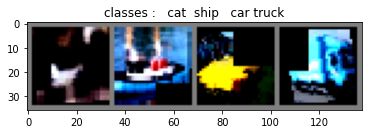

In [49]:
data = cifar_dataloader(1000)
trainloader, testloader = data()

In [51]:
data.std

(0.20224972, 0.19936371, 0.2009898)

In [7]:
trainNtest = TrainTest(ResNet18(), trainloader, testloader, lr = 0.05)
trainNtest(2)

Cuda Device : cuda:0


  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.6035881042480469 Batch_id=49 Accuracy=31.08: 100%|██████████| 50/50 [00:34<00:00,  1.46it/s]
  0%|          | 0/50 [00:00<?, ?it/s]


Test set: Average loss: -2.2099, Accuracy: 4117/10000 (41.17%)

EPOCH: 1


Loss=1.5470993518829346 Batch_id=49 Accuracy=44.20: 100%|██████████| 50/50 [00:34<00:00,  1.43it/s]



Test set: Average loss: -2.9082, Accuracy: 4319/10000 (43.19%)

Finished Training


In [68]:
class UnNormalize(object):
    def __init__(self):
        self.mean = data.mean
        self.std = data.std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

def Misclassified_Images(model, test_loader,device = "cuda"):
  model.eval()
  revnorm = UnNormalize()
  test_loss = 0
  correct = 0
  im_pred = {'Correct': [] ,
            'Wrong': []}
  i = 1
  plt_dt = dict()
  with torch.no_grad():
      for data, target in test_loader:
        if (len(im_pred['Correct'])<5) |  (len(im_pred['Wrong'])<5):
          data, target = data.to(device), target.to(device)
          output = model(data)
          test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
          pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
          correct += pred.eq(target.view_as(pred)).sum().item()
          i+=1
          plt_dt['Input'], plt_dt['target'], plt_dt['pred'] = revnorm(data.to('cpu')), target.to('cpu'), pred.to('cpu').view(-1,)

          for id in range(len(data)):
            if plt_dt['target'][id] == plt_dt['pred'][id]:
              if (len(im_pred['Correct'])<5):
                im_pred['Correct'] = im_pred['Correct']+ [{'Image':data[id],'pred':pred[id],'actual' : target[id]}]
            else:
              if (len(im_pred['Wrong'])<5):
                im_pred['Wrong'] = im_pred['Wrong']+ [{'Image':data[id],'pred':pred[id],'actual' : target[id]}]

  return im_pred

def plot_Misclassified(im_pred):
  plt.figure(figsize=(16,16)) 

  for i in range(len(im_pred['Correct'])):
    plt.subplot(1,5,i+1)  
    label_ = data.classes[im_pred['Correct'][i]['actual'].cpu()]
    pred_ = data.classes[im_pred['Correct'][i]['pred'].cpu()[0]]
    # Plot
    plt.title('Actual Value is {label}\n Predicted Value is {pred}'.format(label=label_, pred =pred_),  color='b')
    plt.imshow(im_pred['Correct'][i]['Image'].cpu().permute(1, 2, 0))


  plt.show()

  plt.figure(figsize=(16,16)) 

  for i in range(len(im_pred['Wrong'])):
    plt.subplot(1,5,i+1)  
    label_ = data.classes[im_pred['Wrong'][i]['actual'].cpu()]
    pred_ = data.classes[im_pred['Wrong'][i]['pred'].cpu()[0]]
    # Plot
    plt.title('Actual Value is {label}\n Predicted Value is {pred}'.format(label=label_, pred =pred_), color='r')
    plt.imshow(im_pred['Wrong'][i]['Image'].cpu().permute(1, 2, 0))

  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


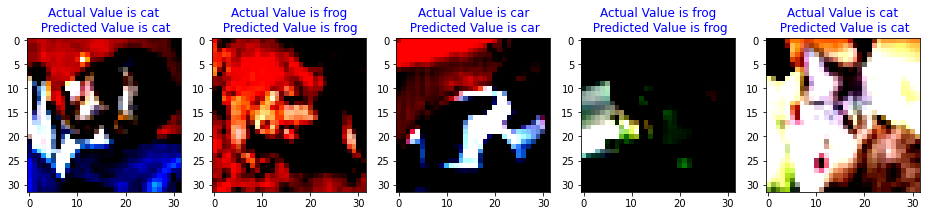

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


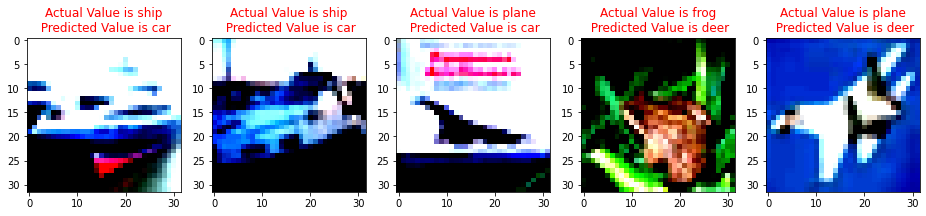

In [69]:
plot_Misclassified(im_pred)

In [64]:
im_pred = Misclassified_Images(trainNtest.model, testloader,device = "cuda")
